<a href="https://colab.research.google.com/github/Alriyan1/Data_Visualization_Tutorial/blob/main/EDA_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance_data.csv')

In [3]:
df.sample(5)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
196,196,197,30.0,male,30.9,89,Yes,0,No,northwest,3062.51
619,619,620,46.0,female,23.9,96,No,5,No,southeast,8582.30
1143,1143,1144,19.0,male,25.5,85,Yes,1,No,northeast,25517.11
1324,1324,1325,39.0,male,39.9,115,No,0,Yes,southwest,48173.36
676,676,677,40.0,female,27.3,100,No,1,No,northeast,9447.25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [5]:
df.isnull().sum()

,0
index,0
PatientID,0
age,5
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,3


In [6]:
df[df['age'].isnull()==True]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45


In [7]:
df[df['region'].isnull()==True]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
13,13,14,32.0,male,27.6,100,No,0,No,NaN,1252.41
14,14,15,40.0,male,28.7,81,Yes,0,No,NaN,1253.94
15,15,16,32.0,male,30.4,86,Yes,0,No,NaN,1256.30


In [8]:
df[df.duplicated()==True]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim


In [9]:
mean_age=df['age'].mean()
mean_age=round(mean_age,1)

In [10]:
df['age'].fillna(mean_age,inplace=True)

<ipython-input-10-85da8b4fcb3e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age,inplace=True)


In [11]:
df['age'].isnull().sum()

0

In [12]:
df.select_dtypes(include='object').columns.tolist()

['gender', 'diabetic', 'smoker', 'region']

In [13]:
df.select_dtypes(exclude='object').columns.tolist()

['index', 'PatientID', 'age', 'bmi', 'bloodpressure', 'children', 'claim']

In [14]:
df['region'].value_counts()

,count
region,
southeast,443
northwest,349
southwest,314
northeast,231


In [15]:
region_mode=df['region'].mode()
region_mode

,region
0,southeast


In [16]:
region_mode[0]

'southeast'

In [17]:
df['region'].fillna(region_mode[0],inplace=True)

<ipython-input-17-e1b5c2a08eb2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].fillna(region_mode[0],inplace=True)


In [18]:
df['region'].isnull().sum()

0

In [19]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078731,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.082175,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [20]:
df.describe(include='object').T

,count,unique,top,freq
gender,1340,2,male,678
diabetic,1340,2,No,698
smoker,1340,2,No,1066
region,1340,4,southeast,446


In [21]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,38.1,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,38.1,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,38.1,male,34.1,100,No,0,No,northwest,1137.01


<Axes: ylabel='Density'>

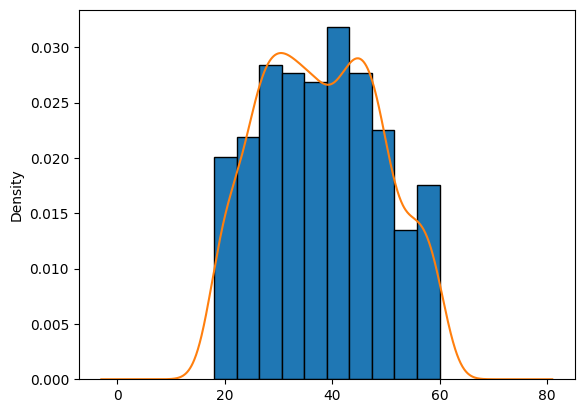

In [22]:
ax=df['age'].plot(kind='hist',density=True,edgecolor='black')
df['age'].plot(kind='kde',ax=ax)

<Axes: >

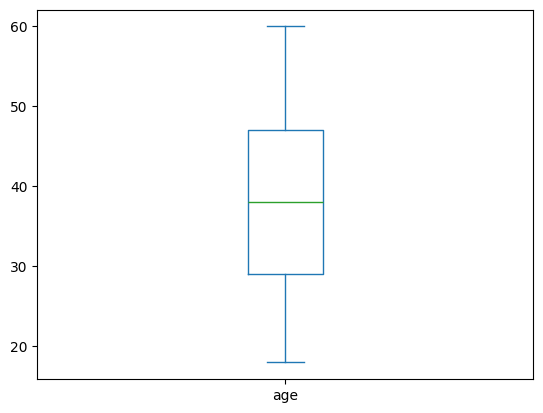

In [23]:
df['age'].plot(kind='box')

In [24]:
df['age'].skew()

0.113801817493798

from above we can say that there in no outlier in the data and most of the people is of age 30-50

<Axes: ylabel='Density'>

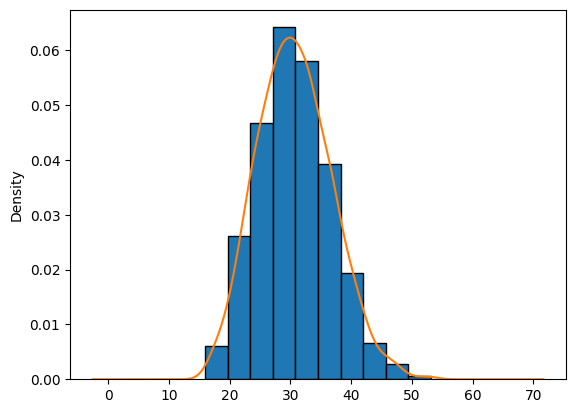

In [25]:
ax=df['bmi'].plot(kind='hist', density=True, edgecolor='black')
df['bmi'].plot(kind='kde',ax=ax)

<Axes: >

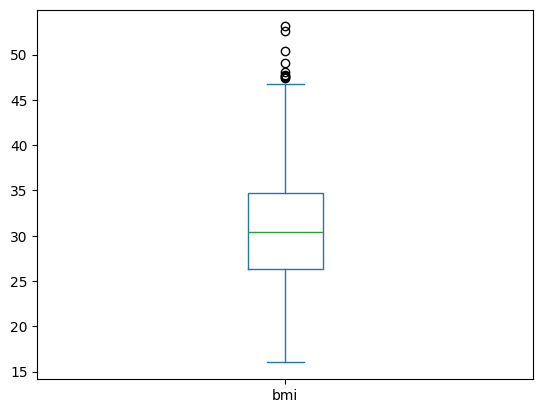

In [26]:
df['bmi'].plot(kind='box')

In [27]:
df['bmi'].skew()

0.28597245020808587

from above graph we can say that there are some outlier in it and most of the people are of range 25-35 bmi

In [28]:
df[df['bmi']>50]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
141,141,142,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
1299,1299,1300,50.0,male,52.6,110,No,1,Yes,southeast,44501.40


In [29]:
df.drop(df[df['bmi']>50].index,inplace=True)

In [30]:
df.shape

(1337, 11)

<Axes: ylabel='Density'>

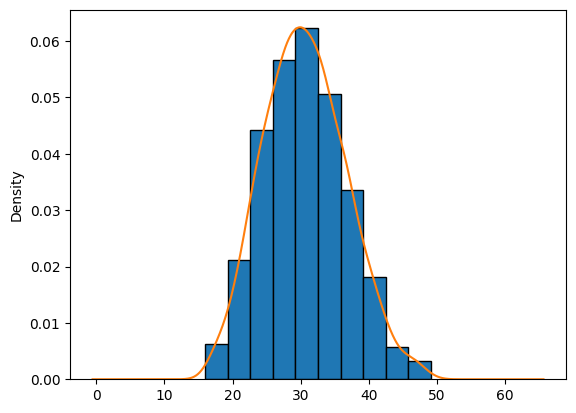

In [31]:
ax=df['bmi'].plot(kind='hist', density=True, edgecolor='black')
df['bmi'].plot(kind='kde',ax=ax)

In [32]:
df['bmi'].skew()

0.22079898706217982

<Axes: >

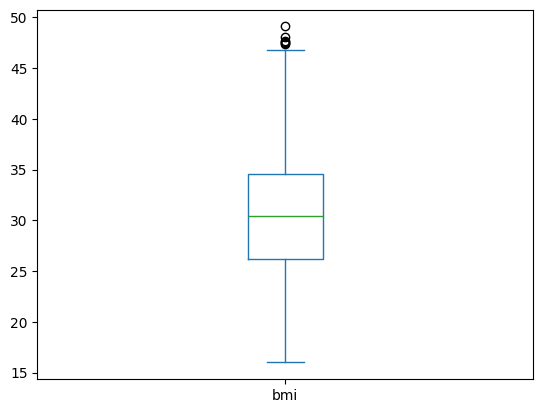

In [33]:
df['bmi'].plot(kind='box')

In [34]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,38.1,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,38.1,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,38.1,male,34.1,100,No,0,No,northwest,1137.01


In [35]:
df.drop(columns='index',inplace=True)

In [36]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.1,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.1,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.1,male,34.1,100,No,0,No,northwest,1137.01


In [37]:
df['gender'].value_counts()

,count
gender,
male,675
female,662


<Axes: ylabel='count'>

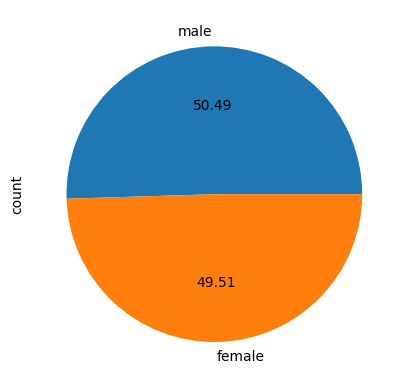

In [38]:
df['gender'].value_counts().plot(kind='pie',autopct='%.2f')

In [39]:
df[df['gender']=='male']['age'].mean()

33.74148148148148

In [40]:
df[df['gender']=='female']['age'].mean()


42.483383685800604

from above calculation we can say that male avg. age is smaller than female means that there are more older female that are claiming the insurance

In [41]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.1,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.1,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.1,male,34.1,100,No,0,No,northwest,1137.01


<Axes: ylabel='Density'>

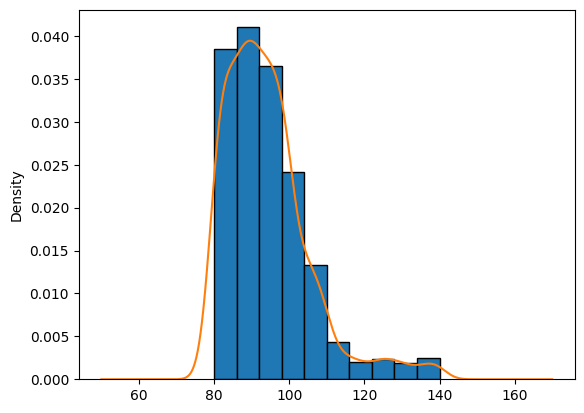

In [43]:
ax=df['bloodpressure'].plot(kind='hist',density=True,edgecolor='black')
df['bloodpressure'].plot(kind='kde',ax=ax)

In [45]:
df['bloodpressure'].skew()

1.4862354466259435

<Axes: >

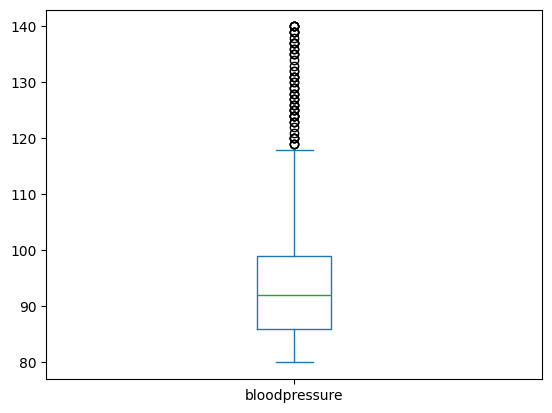

In [46]:
df['bloodpressure'].plot(kind='box')

In [48]:
df[df['bloodpressure']>120].shape

(55, 10)

In [49]:
df[df['bloodpressure']>120]['gender'].value_counts()

,count
gender,
male,31
female,24


From above analysis we can say that there are 55 people whose bloodpressure is above aveage(120) and out of them 31 are male and 24 are female

In [50]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.1,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.1,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.1,male,34.1,100,No,0,No,northwest,1137.01


<Axes: xlabel='diabetic'>

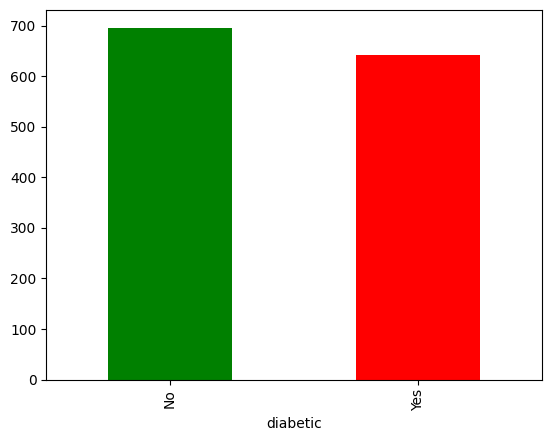

In [54]:
df['diabetic'].value_counts().plot(kind='bar',color=['green','red'])

In [63]:
df[(df['diabetic']=='Yes') & (df['gender']=='male')]['age'].mean()

33.54811320754717

In [64]:
df[(df['diabetic']=='Yes') & (df['gender']=='female')]['age'].mean()

41.916408668730654

In [65]:
df[df['diabetic']=='Yes']['age'].mean()

37.76489859594383

In [58]:
df[df['diabetic']=='Yes']['gender'].value_counts()

,count
gender,
female,323
male,318


There are total of 641 patients who has diabeties out of them 323 are female and 318 are male and average age of these patients are 37.7

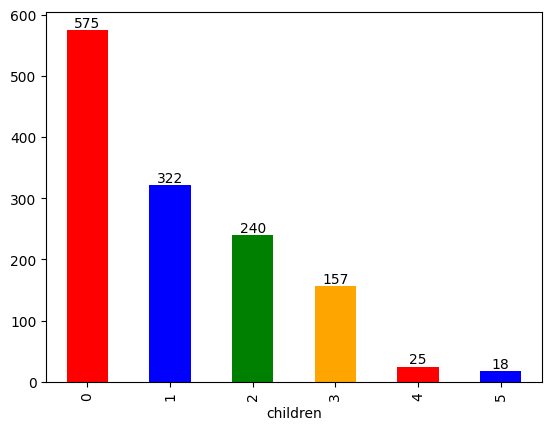

In [79]:
ax=df['children'].value_counts().plot(kind='bar', color=['red','blue','green','orange'])
for i in ax.containers:
  ax.bar_label(i)

from the grapg we can say that there are 575 parents with 0 child ,322 parents with 1 chile,240 with 2 child, 157 with 3, 25 with 4 child and 18 with 5 child

In [82]:
df['smoker'].value_counts()

,count
smoker,
No,1064
Yes,273


In [83]:
df[df['smoker']=='Yes']['gender'].value_counts()

,count
gender,
male,158
female,115


In [84]:
df[(df['diabetic']=='Yes') & (df['smoker']=='Yes')]['gender'].value_counts()

,count
gender,
male,76
female,60


there are 273 people who smokes and out of them 158 are male and 115 are female and 76 male are those who have diabeties and as well as smoker and 60 female who have diabeties and smokes

In [85]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.1,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.1,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.1,male,34.1,100,No,0,No,northwest,1137.01


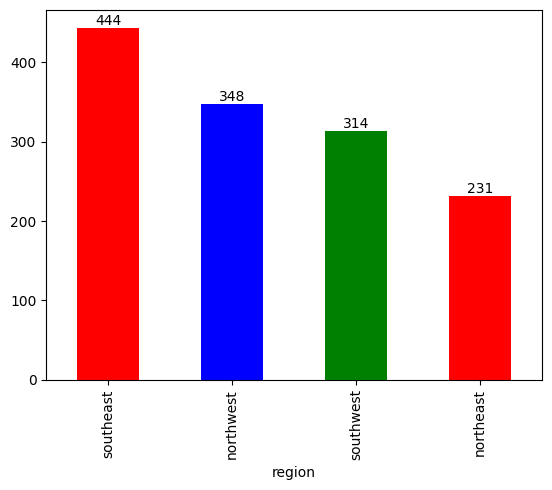

In [91]:
ax=df['region'].value_counts().plot(kind='bar',color=['red','blue','green'])
for i in ax.containers:
  ax.bar_label(i)

<Axes: ylabel='Density'>

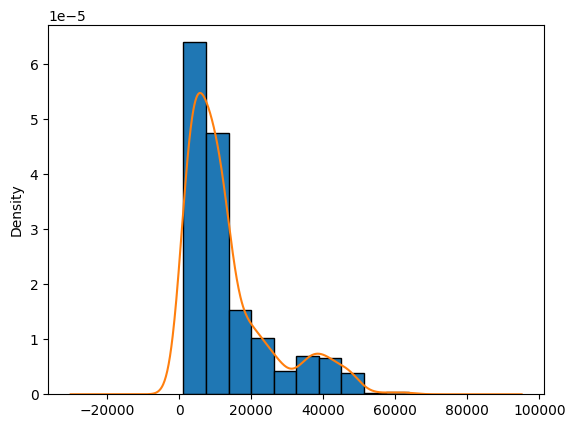

In [93]:
ax=df['claim'].plot(kind='hist',density=True,edgecolor='black')
df['claim'].plot(kind='kde',ax=ax)

In [94]:
df['claim'].skew()

1.5193924918021937

In [96]:
def age_group(age):
  if age>=18 and age<29:
    return '18-29'
  elif age>=29 and age<39:
    return '29-39'
  elif age>=39 and age<49:
    return '39-49'
  else:
    return '49-60'

In [97]:
df['age_group']=df['age'].apply(age_group)

In [98]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,39-49
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,18-29
2,3,38.1,male,33.3,82,Yes,0,No,southeast,1135.94,29-39
3,4,38.1,male,33.7,80,No,0,No,northwest,1136.40,29-39
4,5,38.1,male,34.1,100,No,0,No,northwest,1137.01,29-39


Average age of Diabetic people Across Different Regions

In [99]:
df[df['diabetic']=='Yes'].groupby('region')['age'].mean()

,age
region,
northeast,37.322314
northwest,36.351592
southeast,38.922831
southwest,37.916667


Text(0, 0.5, 'Age')

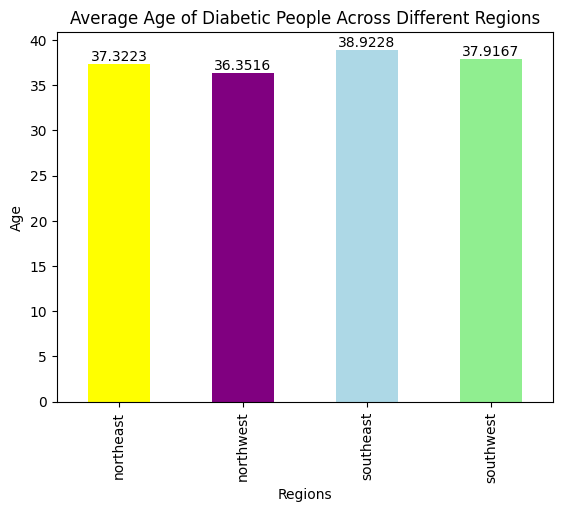

In [110]:
ax=df[df['diabetic']=="Yes"].groupby('region')['age'].mean().plot(kind='bar',color=['yellow','purple','lightblue','lightgreen'])
for i in ax.containers:
  ax.bar_label(i)
plt.title('Average Age of Diabetic People Across Different Regions')
plt.xlabel('Regions')
plt.ylabel('Age')

Distribution of BMI across Age Groups and Regions

Text(0, 0.5, 'BMI')

<Figure size 2000x1500 with 0 Axes>

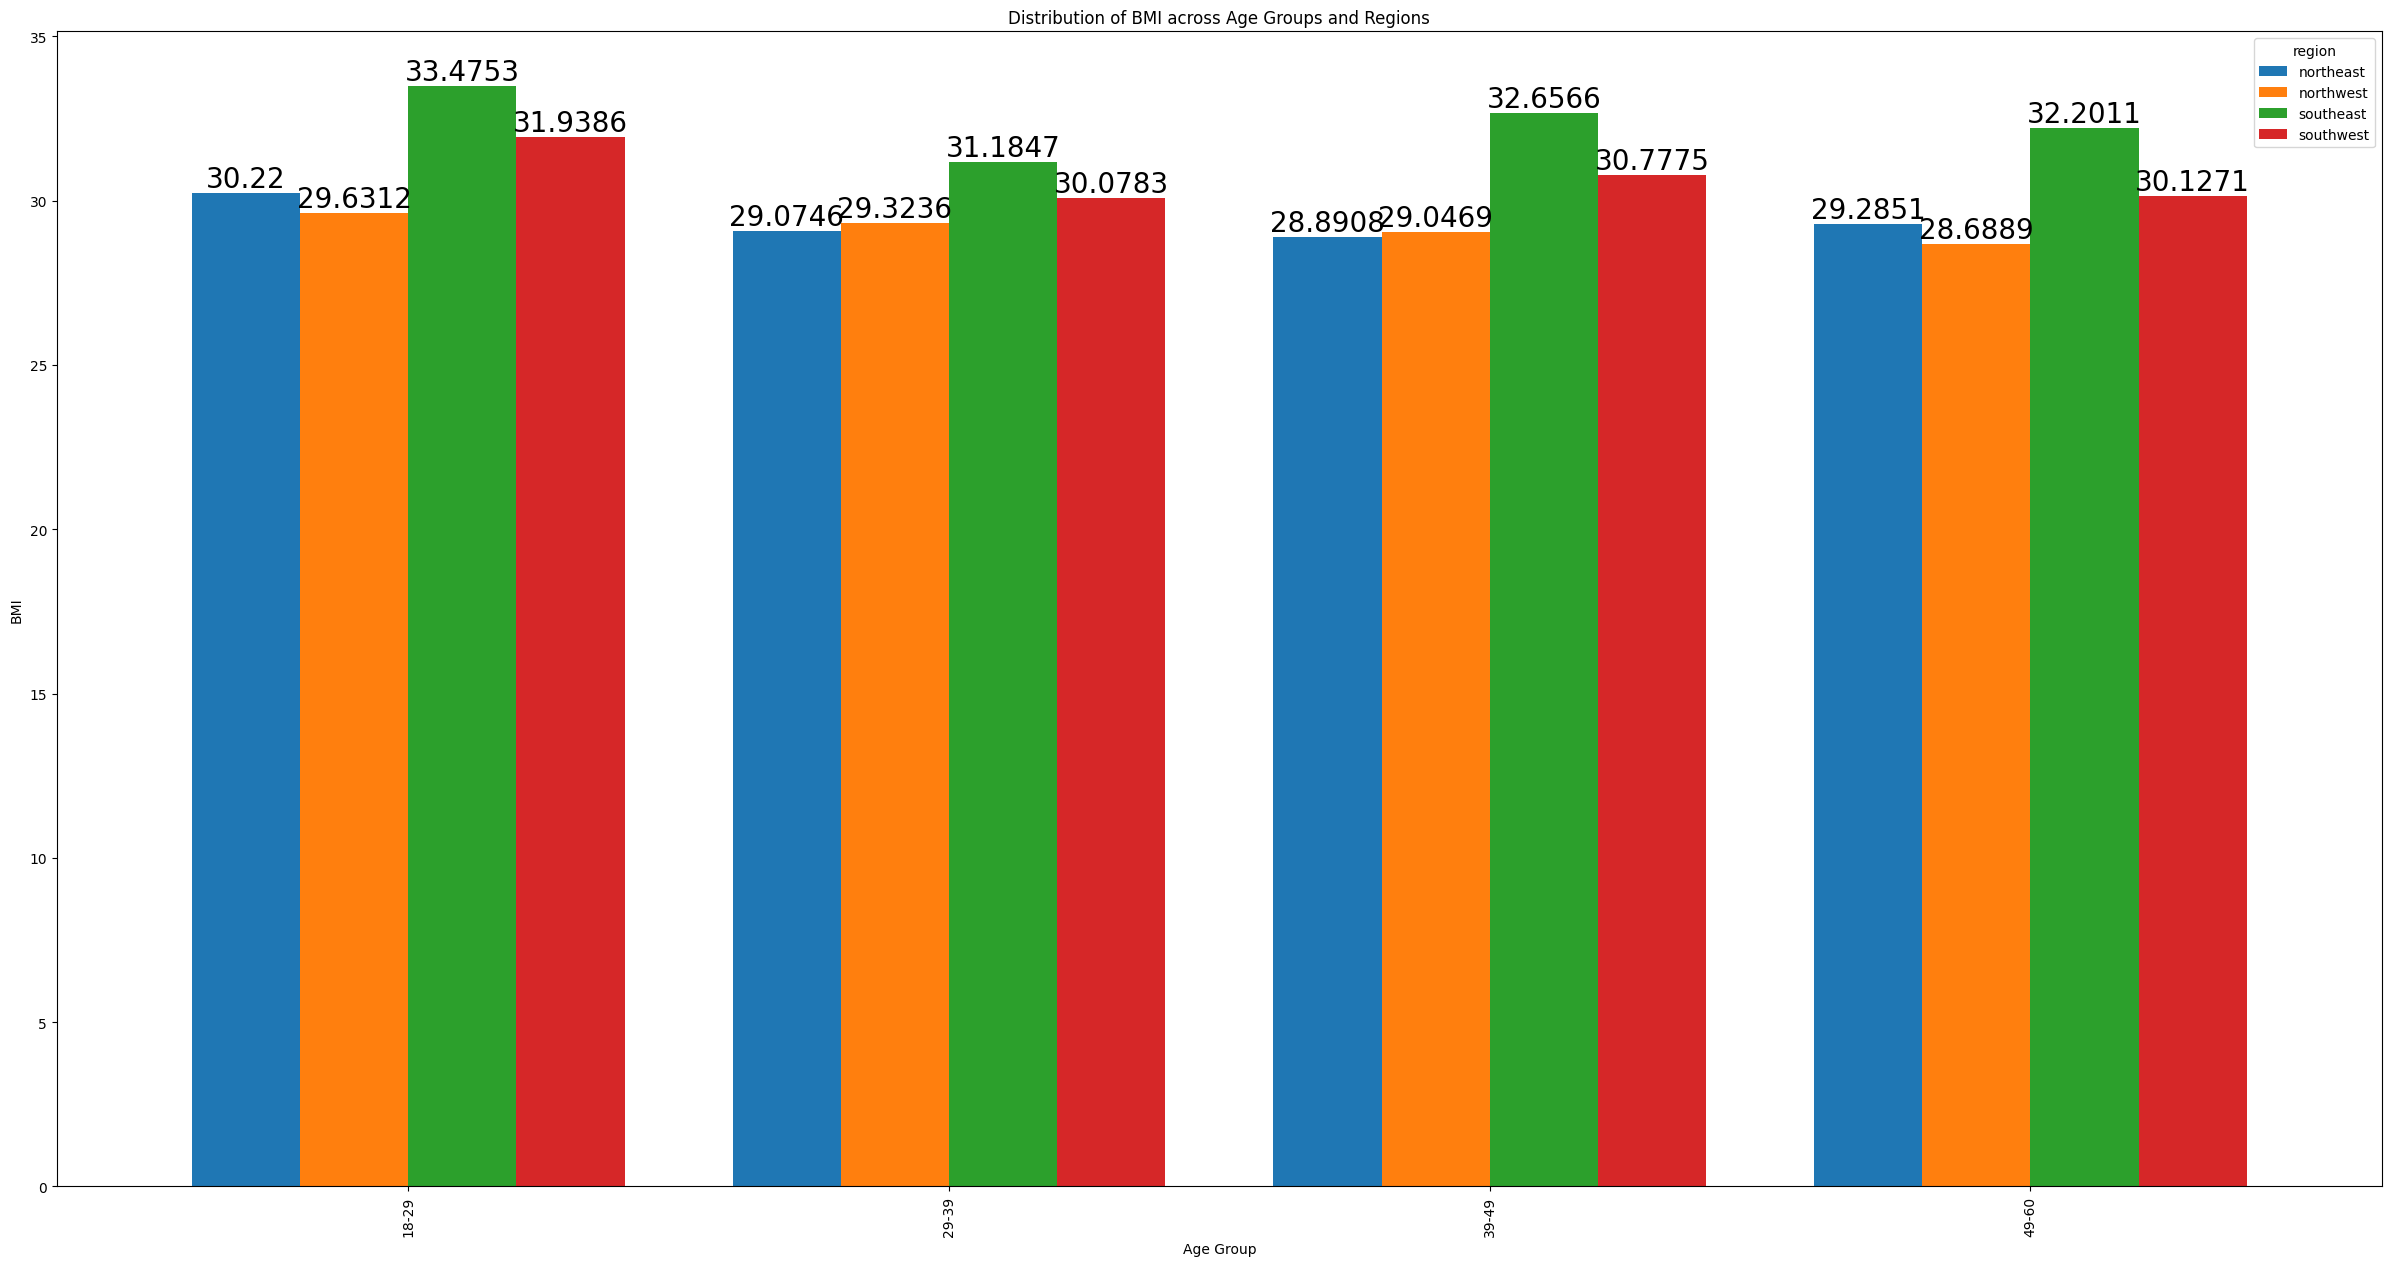

In [171]:
plt.figure(figsize=(20,15))
ax=df.groupby(['age_group','region'])['bmi'].mean().unstack().plot(kind='bar',width=.8,figsize=(30,15))
for i in ax.containers:
  ax.bar_label(i,fontsize=20)
plt.title('Distribution of BMI across Age Groups and Regions')
plt.xlabel('Age Group')
plt.ylabel('BMI')

Is there a correlation between blood pressure levels and BMI for patients with and without diabetes?

Text(0.5, 1.0, 'Correlation Between Blood Pressure and BMI for Patients with and without Diabetes')

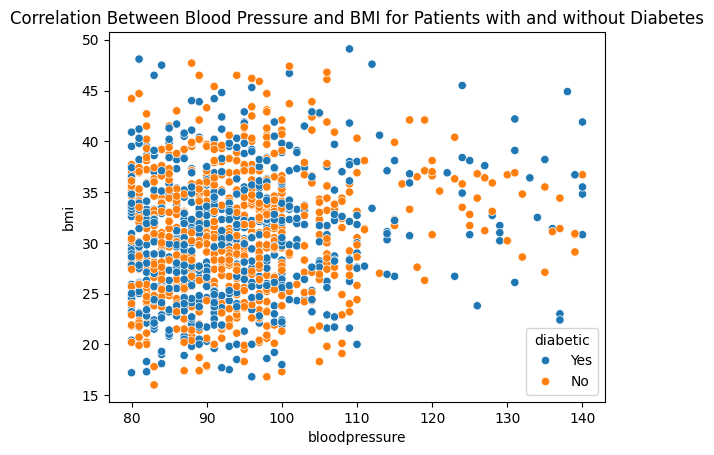

In [134]:
sns.scatterplot(data=df,x='bloodpressure',y='bmi',hue='diabetic')
plt.title('Correlation Between Blood Pressure and BMI for Patients with and without Diabetes')


From the scatter plot, it is evident that the majority of the patients who claimed insurance fall within the blood pressure range of 80 to 110 and the BMI range of 20 to 40, irrespective of their diabetic status

How does the number of children in a family impact the likelihood of having a diabetic condition

Text(0.5, 1.0, 'Diabetic condition based on the number of children')

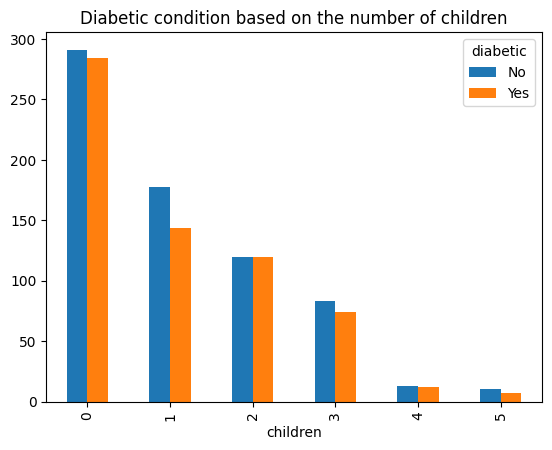

In [135]:
df.groupby('children')['diabetic'].value_counts().unstack().plot(kind='bar')
plt.title('Diabetic condition based on the number of children')


In [138]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,39-49
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,18-29
2,3,38.1,male,33.3,82,Yes,0,No,southeast,1135.94,29-39
3,4,38.1,male,33.7,80,No,0,No,northwest,1136.40,29-39
4,5,38.1,male,34.1,100,No,0,No,northwest,1137.01,29-39


Text(0, 0.5, 'Average Claim Amount')

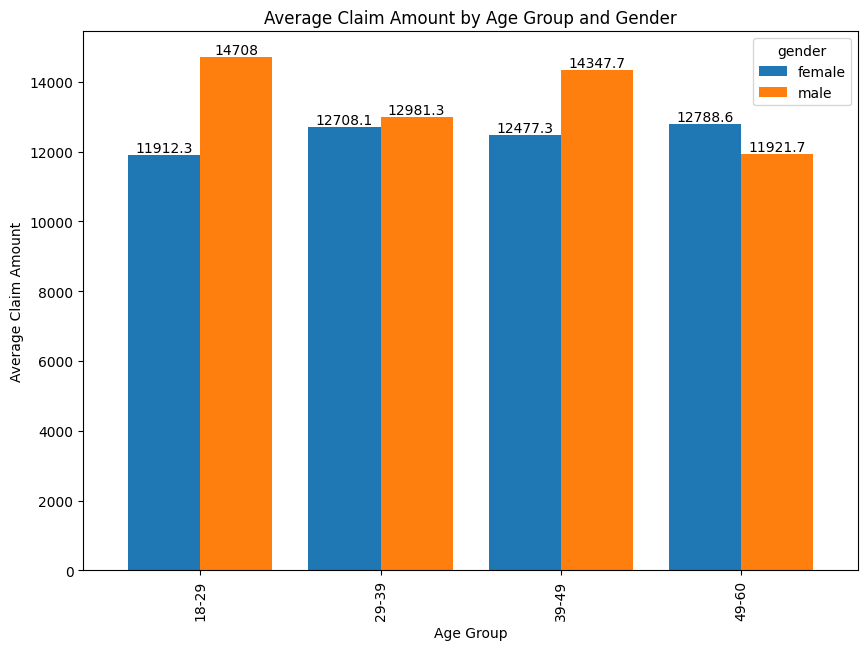

In [164]:
ax=df.groupby(['age_group','gender'])['claim'].mean().unstack().plot(kind='bar',width=.8,figsize=(10,7))
for i in ax.containers:
  ax.bar_label(i,label_type='edge')
plt.title('Average Claim Amount by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Claim Amount')

From the above bar plot, we observe that males receive a higher average claim amount in each age group. In the 18-29 age group, the average claim amount for males is 14,708, while for females, it is 11,912.30. In the 29-39 age group, males receive 12,981 on average, whereas females receive 12,708. In the 39-49 age group, the average claim amount for males is 14,347, whereas for females, it is 12,477. In the 49-60 age group, males receive an average of 11,921, while females receive 12,788

Text(0, 0.5, 'Average Claim Amount')

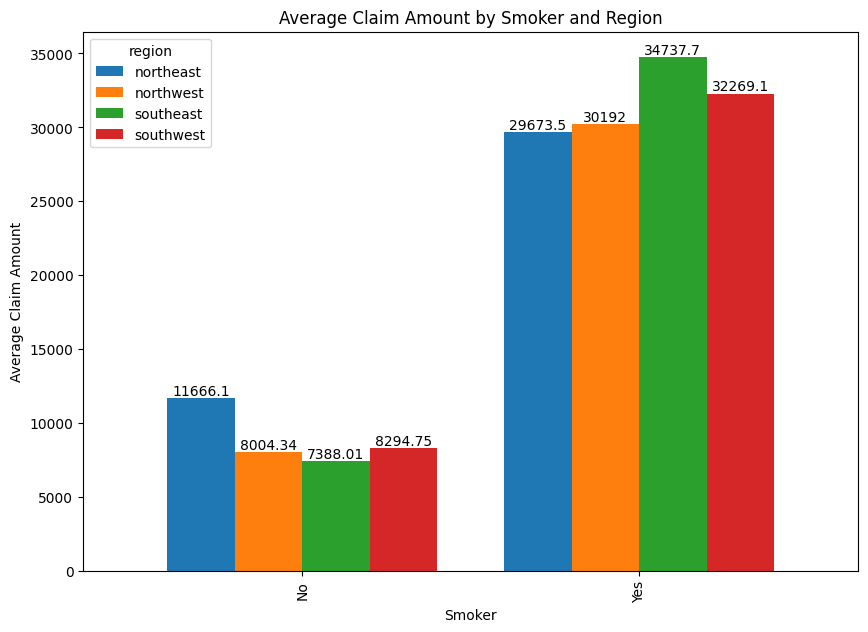

In [178]:
ax=df.groupby(['smoker','region'])['claim'].mean().unstack().plot(kind='bar',width=.8,figsize=(10,7))
for i in ax.containers:
  ax.bar_label(i)
plt.title('Average Claim Amount by Smoker and Region')
plt.xlabel('Smoker')
plt.ylabel('Average Claim Amount')

From the bar plot, we observed distinct trends in insurance claims based on smoking habits and regions. Smokers in the southeast region had the highest average claim amount, reaching 34,737. Additionally, in the northwest and southwest regions, smokers had average claim amounts of 30,192 and 32,269, respectively. Meanwhile, non-smokers in the southeast region had the lowest average claim amount at 7,388, followed by the northwest and southwest regions with average claim amounts of 8,004 and 8,294, respectively. Surprisingly, non-smokers in the northeast region had a notably higher average claim amount of 11,666